**Welcome to Handwritten Character Recognition in Python jypter Notebook**

**In this notebook, I learn about evaluating machine learning models for Hanwritten characeter recognition system. It help me to develop my skills to split the data into features (pixel values) and labels (character classes). The code reshapes the pixel data for visualization, displaying sample images of each letter to confirm daat structure. The model is traine dto classify the characters based on their pixel patterns. The model's performance is evaluated on the test set, displaying its accuracy,and detailed classification report, which included metrics such as precision and recall for each character class**

In [4]:
# Library for data analysis
import numpy as np
import pandas as pd

# Library for data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Library for model selection and splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_score

#Library for evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Libraries for classification algorithms
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv(r'C:\Users\user\Desktop\Github/A_Z Handwritten Data.csv')

#Diplay the last 30 rows of the dataset
data.tail(30)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372420,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372421,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372422,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372423,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372424,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372425,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372426,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372427,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372428,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372429,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**This code shows the one image per character (A-Z). By filtering data by label, it ensures that each subplot represents a unique letter in the alphabet, giving a complete view of each character type in the dataset.**

**The first instance of each instance of each character label, ensuring each displayed image corresponds to teh unique character. This approach organizes the grid so that each subplot shows a different letter, from 'A' to 'Z'.**

It is intended to inspect each character once, displaying the full alphabet (A-Z) for quality and consistency checks. This approach is ideal when you want a single representative of each character type in the dataset.

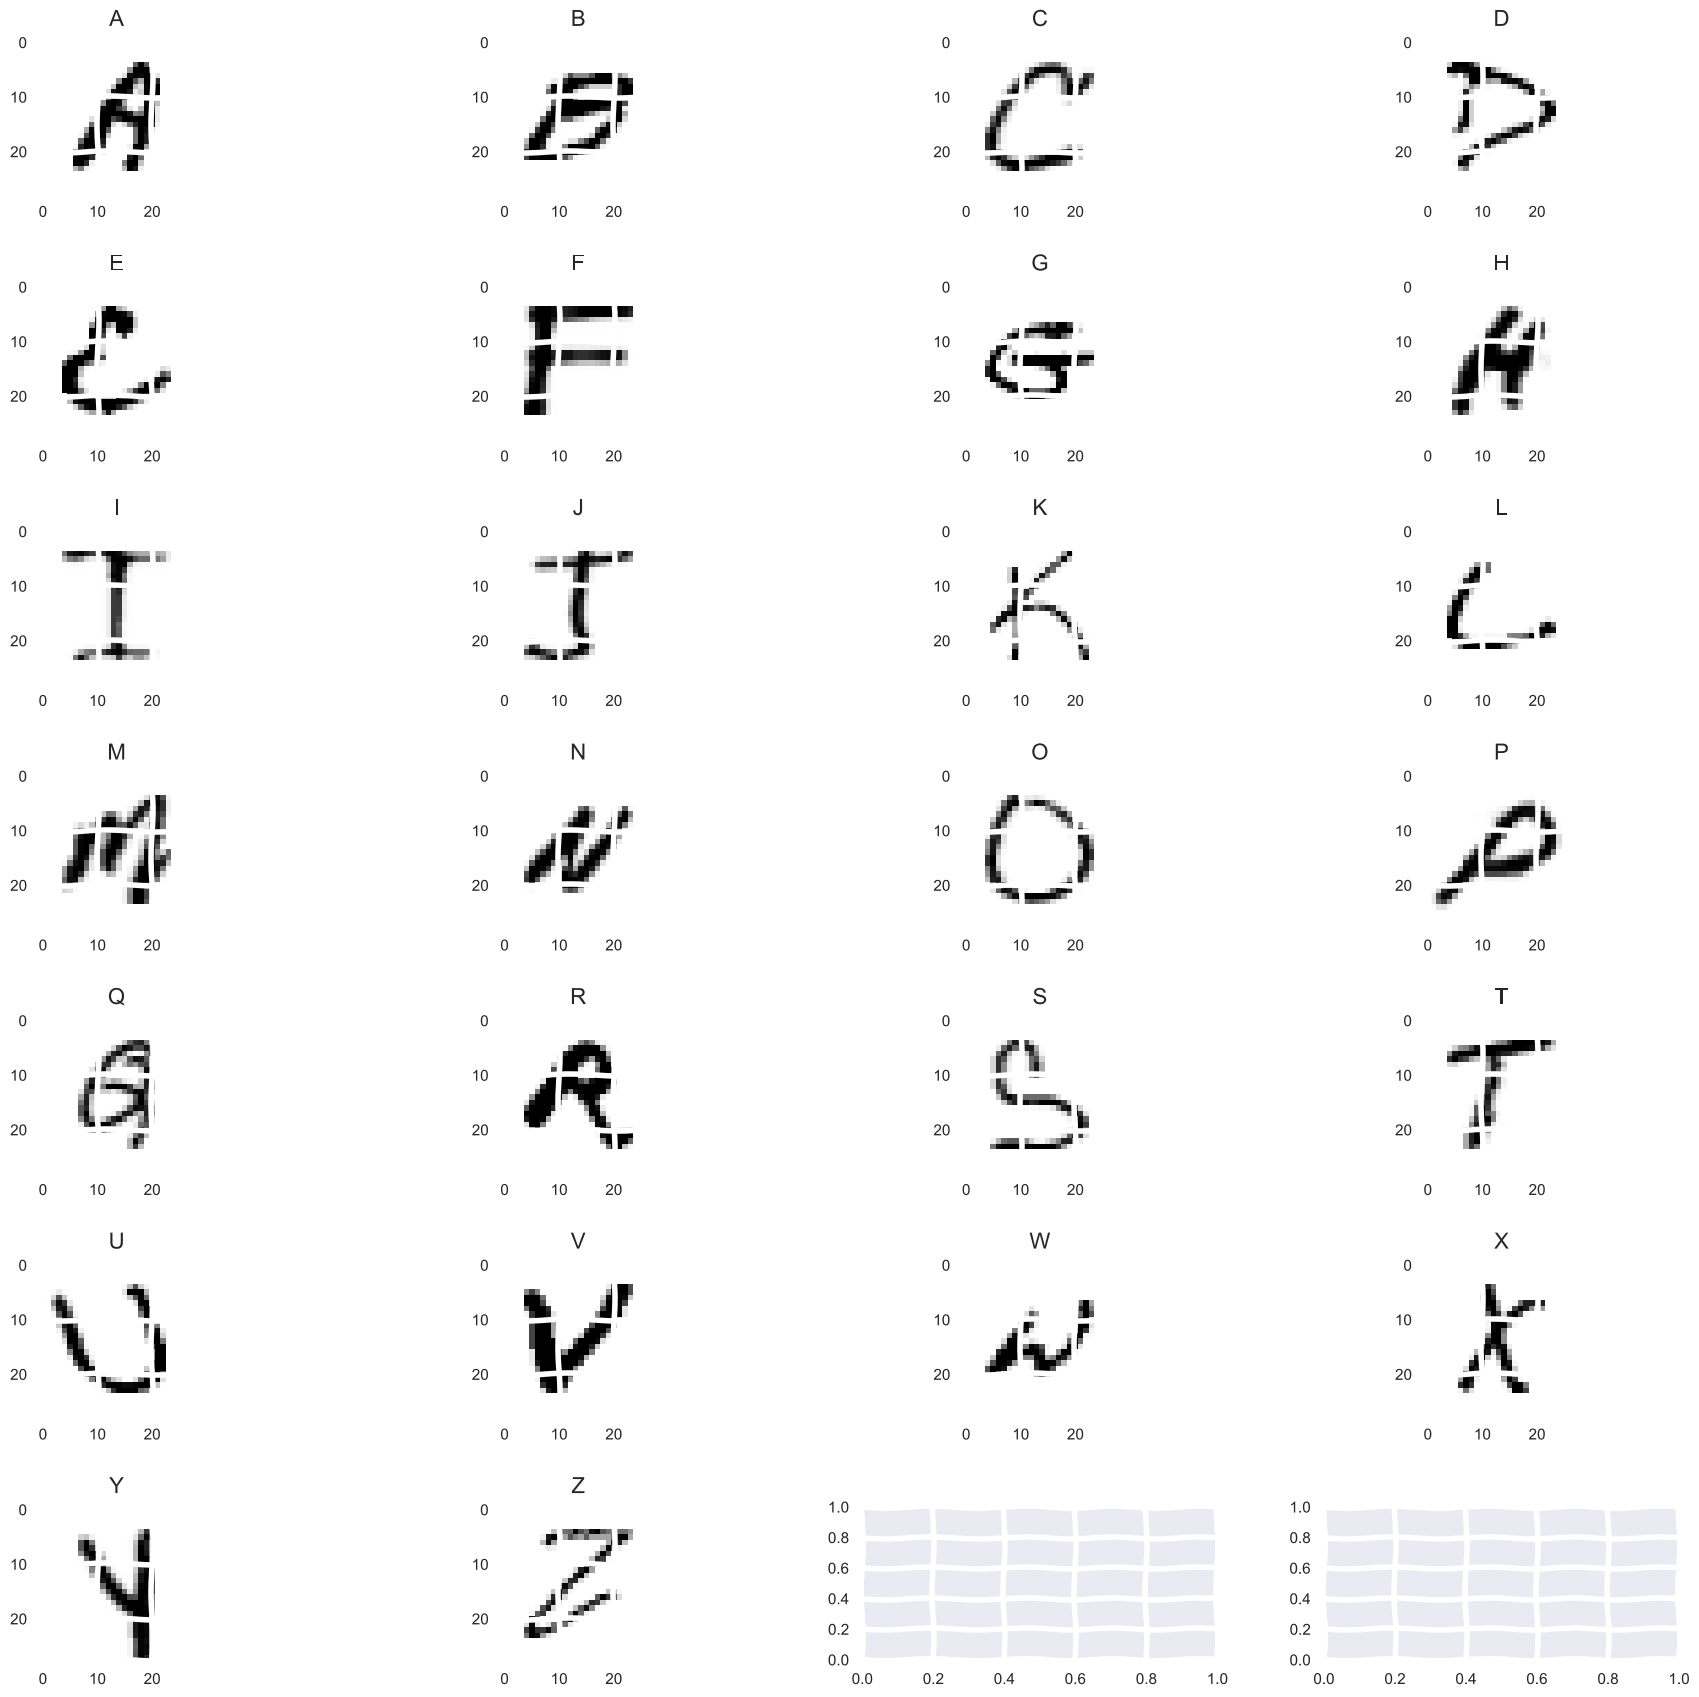

In [106]:
# Separate features and target
X = data.drop('0', axis=1)
y = data['0']

# Reshape X for visualization
X = X.values.reshape(-1, 28, 28)

# Create a 5x6 grid of subplots to display all 26 letters
fig, axes = plt.subplots(7, 4, figsize=(20, 20))
axes = axes.flatten()

for i in range(26):
    # Filter rows where the label is equal to i and select the first matching row
    dd = data[data['0'] == i].iloc[0]
    x = dd[1:].values.reshape(28, 28)

    # Display the image in the specified colormap
    axes[i].imshow(x, cmap="Greys")
    axes[i].axis('on')  # Hide the axes for a cleaner look
    axes[i].set_title(chr(65 + i), fontsize=16, pad =10)  # Set title as A-Z (ASCII 65 for 'A')

# Adjust the spacing between images
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

**This code shows the nine random images from x without associating each to a specific character. These could be different instances of the same letter or different letters. The images are choosen by their order in x rather than by character type.**


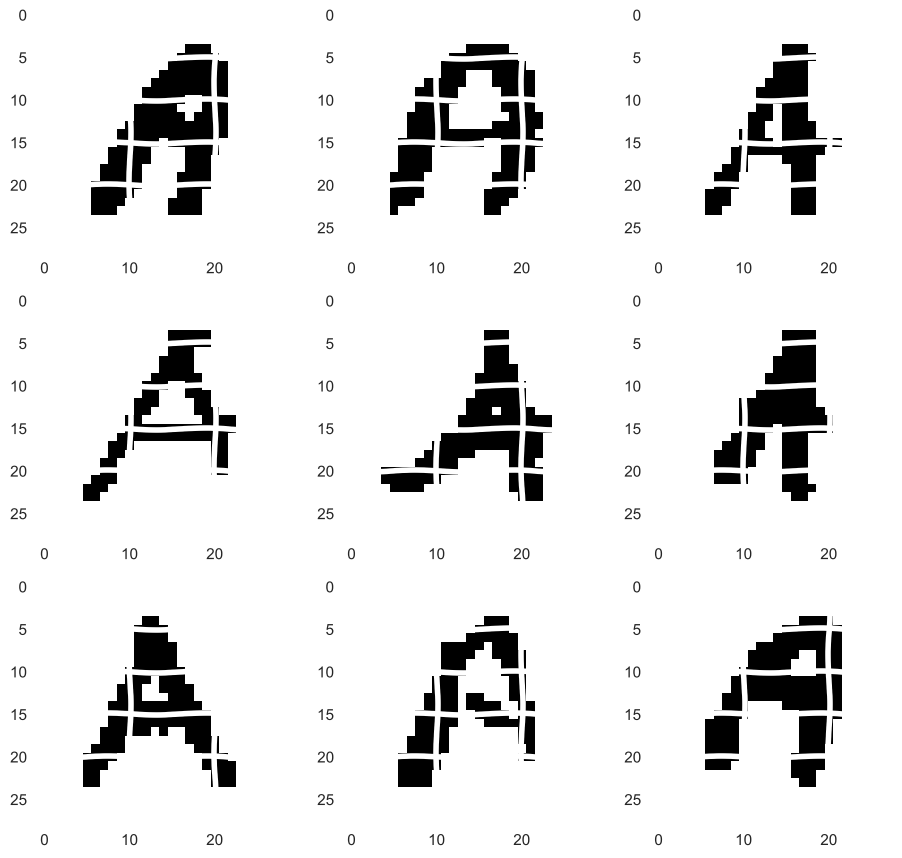

In [107]:
# Separate features and target
X = data.drop('0', axis=1)
y = data['0']

# Reshape X for visualization
X = X.values.reshape(-1, 28, 28)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Display images with binary thresholding
for i in range(9):
    # Apply thresholding manually
    thresholded_img = np.where(X[i] > 30, 200, 0)
    axes[i].imshow(thresholded_img, cmap="Greys")
    axes[i].axis('on')  # Hide axes for cleaner display

plt.show()

In [113]:
X = data.drop('0',axis=1)
y = data['0']

In [114]:
# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150, random_state=42)
RFC.fit(X_train, y_train)

# Make predictions on the test set
ypred = RFC.predict(X_test)

# Print the classifier and the accuracy score
print(f"RandomForestClassifier Accuracy: {accuracy_score(y_test, ypred) * 100:.2f}%")

# Print the classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, ypred))

RandomForestClassifier Accuracy: 98.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4518
           1       0.98      0.95      0.97      2822
           2       0.99      0.99      0.99      7893
           3       0.97      0.95      0.96      3285
           4       0.99      0.97      0.98      3773
           5       1.00      0.93      0.96       367
           6       0.98      0.96      0.97      1881
           7       0.97      0.94      0.96      2363
           8       0.99      0.96      0.97       383
           9       0.98      0.96      0.97      2738
          10       0.97      0.95      0.96      1876
          11       0.99      0.99      0.99      3784
          12       0.98      0.97      0.97      4081
          13       0.97      0.99      0.98      6131
          14       0.98      1.00      0.99     19161
          15       0.99      0.99      0.99      6417
          16     

In [109]:
y_train.value_counts()

0
14    38664
18    32513
20    19346
2     15516
19    15056
15    12924
13    12879
0      9351
12     8255
17     7814
11     7802
4      7667
24     7293
22     7155
3      6849
1      5846
9      5755
7      4855
23     4160
25     4075
6      3881
16     3864
10     3727
21     2761
5       796
8       737
Name: count, dtype: int64

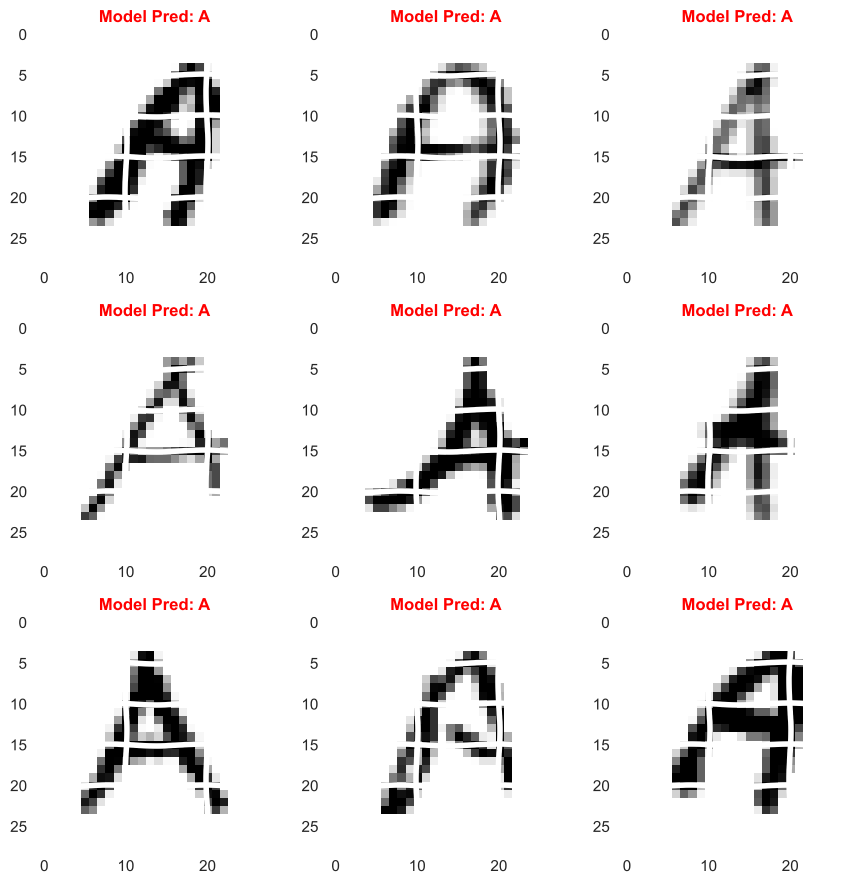

In [116]:
# Define the alphabet mapping
listalph = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
            'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z']
dictalph = {i: listalph[i] for i in range(26)}

def perdhandwritten(indices):
    # Limit indices to 9, to match the 3x3 subplot grid
    indices = indices[:9]

    fig, axes = plt.subplots(3, 3, figsize=(9, 9))  # Create a 3x3 subplot grid
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for idx, ind in enumerate(indices):
        if ind >= len(data):
            print(f"Index {ind} is out of bounds for the data.")
            continue
            
        x = data.iloc[[ind]]  # Get the row corresponding to the index
        row = x.drop('0', axis=1)  # Drop the first column (assumed label column)
        y_pred = RFC.predict(row)  # Predict the character
        
        plot_data = row.values.reshape((28, 28))  # Reshape for display
        ti = dictalph.get(y_pred[0], 'Unknown')  # Get the predicted character

        axes[idx].imshow(plot_data, cmap='binary')  # Display the image
        axes[idx].set_title(f'Model Pred: {ti}',fontweight = 'bold', color = 'red')  # Set the title with prediction
        axes[idx].axis('on')  # Hide axes for clarity

    # Hide any unused subplots
    for ax in axes[len(indices):]:
        ax.axis('on')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plot

# Example usage: display predictions for the first 9 handwritten characters
indices_to_predict = range(26)  # Use a range to display A to Z
perdhandwritten(indices_to_predict)

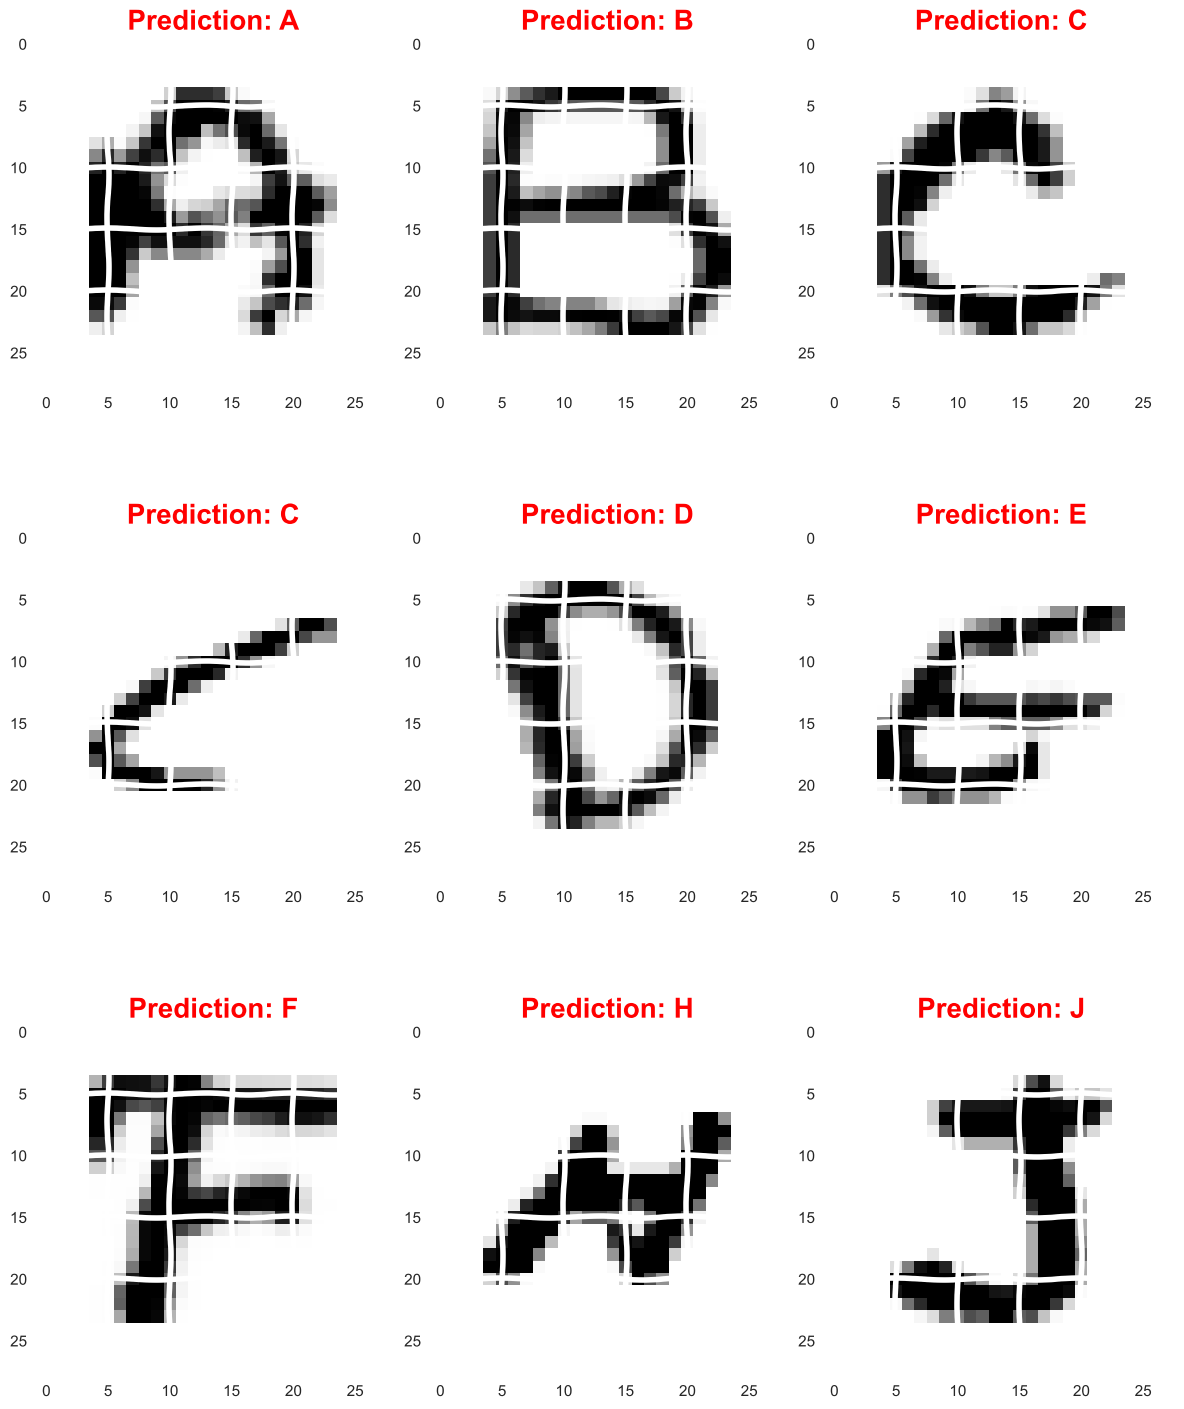

In [117]:
# Assume RFC, data, and other required variables are already defined

# Alphabet and dictionary mapping
listalph = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
dictalph = {i: listalph[i] for i in range(26)}

# Function to predict and return plot data and title
def perdhandwritten(ind):
    x = data.iloc[[ind]]
    row = x.drop('0', axis=1)
    y_pred = RFC.predict(row)
    plot_data = row.values.reshape((28, 28))
    ti = dictalph.get(y_pred[0])
    return plot_data, ti

# Collect predictions and images for multiple indices
indices = [3323, 15323, 25323, 38323, 48323, 58323, 68323, 78323, 88323]
images = []
predictions = []

for ind in indices:
    image, pred = perdhandwritten(ind)
    images.append(image)
    predictions.append(pred)


# Plotting all results with 3x3 layout and enhanced styling
fig, axes = plt.subplots(3, 3, figsize=(12, 15))
axes = axes.flatten()

for ax, img, pred in zip(axes, images, predictions):
    ax.imshow(img, cmap='Greys')
    ax.set_title(f"Prediction: {pred}", fontsize=20, fontweight='bold', color='red')
    ax.grid(True)

# Hide any unused axes in case the grid is not fully occupied
for ax in axes[len(images):]:
    ax.axis('off')

plt.tight_layout()
plt.show()